In [ ]:
Q1 a

In [ ]:
# Uncomment the code given below
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit-aer
!pip install 'qiskit[visualization]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import time
import numpy as np
def deutsch_jozsa_algorithm(n, oracle_type='balanced'):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.barrier()
    for i in range(n + 1):
        qc.h(i)
    qc.barrier()
    if oracle_type == 'balanced':
        qc.cx(0, n)
    elif oracle_type == 'constant':
        pass
    qc.barrier()
    for i in range(n):
        qc.h(i)
    qc.barrier()
    qc.measure(range(n), range(n))
    return qc

In [ ]:
def balanced_dj_circuit():
    n = 5
    qc = deutsch_jozsa_algorithm(n, oracle_type='balanced')
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()
    plot_histogram(counts)
    return counts

counts_balanced = balanced_dj_circuit()
print("Counts for balanced function:", counts_balanced)

Counts for balanced function: {'00001': 1024}


In [ ]:
def constant_dj_circuit():
    n = 3
    qc = deutsch_jozsa_algorithm(n, oracle_type='constant')
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()
    plot_histogram(counts)
    return counts

counts_constant = constant_dj_circuit()
print("Counts for constant function:", counts_constant)

Counts for constant function: {'000': 1024}


In [ ]:
def calculate_execution_time():
    n = 20
    start_time_balanced = time.time()
    qc_balanced = deutsch_jozsa_algorithm(n, oracle_type='balanced')
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc_balanced, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    job.result()
    t1 = time.time() - start_time_balanced

    start_time_constant = time.time()
    qc_constant = deutsch_jozsa_algorithm(n, oracle_type='constant')
    compiled_circuit = transpile(qc_constant, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    job.result()
    t2 = time.time() - start_time_constant

    print(f"Execution time for balanced oracle (t1): {t1}")
    print(f"Execution time for constant oracle (t2): {t2}")
    print(f"Difference (t1 - t2): {t1 - t2}")

calculate_execution_time()

Execution time for balanced oracle (t1): 0.13335299491882324
Execution time for constant oracle (t2): 0.13149428367614746
Difference (t1 - t2): 0.0018587112426757812


Q2

In [ ]:
S = [100, 500, 1000, 2500, 5000]

def calculate_execution_time_vs_shots():
    times_balanced = []
    for shots in S:
        start_time = time.time()
        qc = deutsch_jozsa_algorithm(5, oracle_type='balanced')
        simulator = Aer.get_backend('aer_simulator')
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=shots)
        job.result()
        elapsed_time = time.time() - start_time
        times_balanced.append(elapsed_time)
    return times_balanced

time_balanced = calculate_execution_time_vs_shots()
print("Execution times for balanced oracle:", time_balanced)

Execution times for balanced oracle: [0.12851762771606445, 0.11099839210510254, 0.11635804176330566, 0.11658263206481934, 0.12925028800964355]


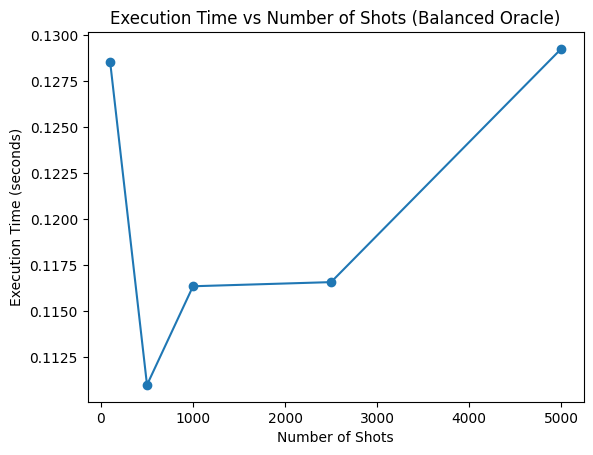

In [ ]:
import matplotlib.pyplot as plt

plt.plot(S, time_balanced, marker='o')
plt.xlabel('Number of Shots')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Shots (Balanced Oracle)')
plt.show()

Q4

In [ ]:
def qft_rotations(circuit, n):
    for i in range(n):
        circuit.h(i)
        for j in range(i + 1, n):
            angle = 2 * np.pi / (2 ** (j - i + 1))
            circuit.cp(angle, j, i)

In [ ]:
def qft(n):
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    qc.barrier()
    return qc

In [ ]:
for n in [2, 3, 4]:
    qc = qft(n)
    print(f"QFT Circuit for n={n}:")
    print(qc.draw())

QFT Circuit for n=2:
     ┌───┐               ░ 
q_0: ┤ H ├─■─────────────░─
     └───┘ │P(π/2) ┌───┐ ░ 
q_1: ──────■───────┤ H ├─░─
                   └───┘ ░ 
QFT Circuit for n=3:
     ┌───┐                                      ░ 
q_0: ┤ H ├─■────────■───────────────────────────░─
     └───┘ │P(π/2)  │       ┌───┐               ░ 
q_1: ──────■────────┼───────┤ H ├─■─────────────░─
                    │P(π/4) └───┘ │P(π/2) ┌───┐ ░ 
q_2: ───────────────■─────────────■───────┤ H ├─░─
                                          └───┘ ░ 
QFT Circuit for n=4:
     ┌───┐                                                                     »
q_0: ┤ H ├─■────────■─────────────■────────────────────────────────────────────»
     └───┘ │P(π/2)  │       ┌───┐ │                                            »
q_1: ──────■────────┼───────┤ H ├─┼────────■────────■──────────────────────────»
                    │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐              »
q_2: ───────────────■─────────────┼

In [ ]:
simulator = Aer.get_backend('statevector_simulator')

for n in [2, 3, 4]:
    qc = qft(n)
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    statevector = result.get_statevector()
    print(f"Statevector for n={n}:", statevector)


    probabilities = np.abs(statevector.data) ** 2
    counts = {format(i, f'0{n}b'): prob for i, prob in enumerate(probabilities)}
    plot_histogram(counts)

Statevector for n=2: Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector for n=3: Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
Statevector for n=4: Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


Q5

In [ ]:
qc = QuantumCircuit(3)
qc.x(1)
qc.barrier()
qc = qc.compose(qft(3))
print(qc.draw())

           ░ ┌───┐                                      ░ 
q_0: ──────░─┤ H ├─■────────■───────────────────────────░─
     ┌───┐ ░ └───┘ │P(π/2)  │       ┌───┐               ░ 
q_1: ┤ X ├─░───────■────────┼───────┤ H ├─■─────────────░─
     └───┘ ░                │P(π/4) └───┘ │P(π/2) ┌───┐ ░ 
q_2: ──────░────────────────■─────────────■───────┤ H ├─░─
           ░                                      └───┘ ░ 


Statevector: Statevector([ 3.53553391e-01-4.32978028e-17j,
              6.49467042e-17+3.53553391e-01j,
             -3.53553391e-01+4.32978028e-17j,
             -6.49467042e-17-3.53553391e-01j,
              3.53553391e-01-4.32978028e-17j,
              6.49467042e-17+3.53553391e-01j,
             -3.53553391e-01+4.32978028e-17j,
             -6.49467042e-17-3.53553391e-01j],
            dims=(2, 2, 2))


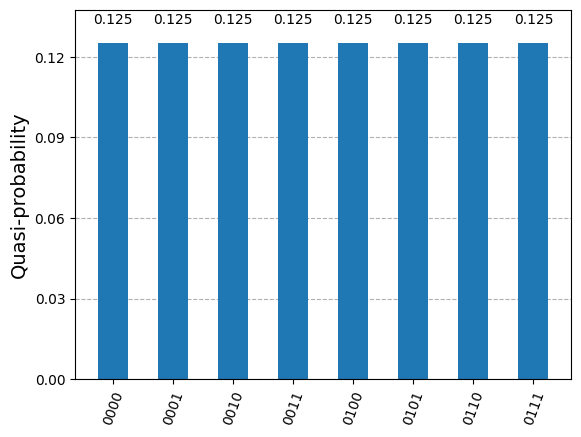

In [ ]:
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
statevector = result.get_statevector()
print("Statevector:", statevector)
probabilities = np.abs(statevector.data) ** 2
counts = {format(i, f'0{n}b'): prob for i, prob in enumerate(probabilities)}
plot_histogram(counts)

In [ ]:
qc_inverse = qc.inverse()
print(qc_inverse.draw())
compiled_circuit = transpile(qc_inverse, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
statevector_inverse = result.get_statevector()
print("Initial state after inverse QFT:", statevector_inverse)

      ░                                         ┌───┐ ░      
q_0: ─░──────────────────────■─────────■────────┤ H ├─░──────
      ░                ┌───┐ │         │P(-π/2) └───┘ ░ ┌───┐
q_1: ─░───────■────────┤ H ├─┼─────────■──────────────░─┤ X ├
      ░ ┌───┐ │P(-π/2) └───┘ │P(-π/4)                 ░ └───┘
q_2: ─░─┤ H ├─■──────────────■────────────────────────░──────
      ░ └───┘                                         ░      
Initial state after inverse QFT: Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


Q6

In [ ]:
# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(4)

# Prepare the initial state |0110>
qc.x(1)  # Flip qubit 1 to |1>
qc.x(2)  # Flip qubit 2 to |1>

# Add a barrier for clarity
qc.barrier()

# Apply QFT
qc = qc.compose(qft(4))

# Draw the circuit
print("QFT Circuit for n=4 with initial state |0110>:")
print(qc.draw())

QFT Circuit for n=4 with initial state |0110>:
           ░ ┌───┐                                                       »
q_0: ──────░─┤ H ├─■────────■─────────────■──────────────────────────────»
     ┌───┐ ░ └───┘ │P(π/2)  │       ┌───┐ │                              »
q_1: ┤ X ├─░───────■────────┼───────┤ H ├─┼────────■────────■────────────»
     ├───┤ ░                │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐»
q_2: ┤ X ├─░────────────────■─────────────┼────────■────────┼───────┤ H ├»
     └───┘ ░                              │P(π/8)           │P(π/4) └───┘»
q_3: ──────░──────────────────────────────■─────────────────■────────────»
           ░                                                             »
«                    ░ 
«q_0: ───────────────░─
«                    ░ 
«q_1: ───────────────░─
«                    ░ 
«q_2: ─■─────────────░─
«      │P(π/2) ┌───┐ ░ 
«q_3: ─■───────┤ H ├─░─
«              └───┘ ░ 


Statevector: Statevector([ 2.50000000e-01-6.12323400e-17j,
             -1.76776695e-01+1.76776695e-01j,
             -7.65404249e-17-2.50000000e-01j,
              1.76776695e-01+1.76776695e-01j,
             -2.50000000e-01+6.12323400e-17j,
              1.76776695e-01-1.76776695e-01j,
              7.65404249e-17+2.50000000e-01j,
             -1.76776695e-01-1.76776695e-01j,
              2.50000000e-01-6.12323400e-17j,
             -1.76776695e-01+1.76776695e-01j,
             -7.65404249e-17-2.50000000e-01j,
              1.76776695e-01+1.76776695e-01j,
             -2.50000000e-01+6.12323400e-17j,
              1.76776695e-01-1.76776695e-01j,
              7.65404249e-17+2.50000000e-01j,
             -1.76776695e-01-1.76776695e-01j],
            dims=(2, 2, 2, 2))


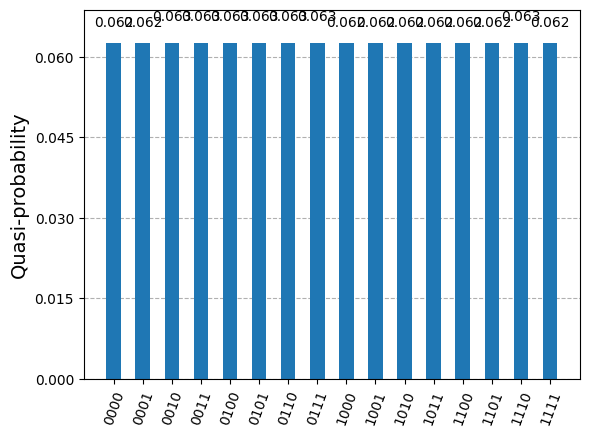

In [ ]:
# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
statevector = result.get_statevector()

# Print the statevector
print("Statevector:", statevector)

# Convert statevector to probabilities
probabilities = np.abs(statevector.data) ** 2

# Create a dictionary of counts from probabilities
counts = {format(i, '04b'): prob for i, prob in enumerate(probabilities)}

# Plot histogram using the counts dictionary
plot_histogram(counts)

In [ ]:
# Perform the inverse QFT
qc_inverse = qc.inverse()

# Draw the inverse QFT circuit
print("Inverse QFT Circuit:")
print(qc_inverse.draw())

# Simulate the inverse QFT circuit
compiled_circuit = transpile(qc_inverse, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
statevector_inverse = result.get_statevector()

# Print the statevector after inverse QFT
print("Initial state after inverse QFT:", statevector_inverse)

Inverse QFT Circuit:
      ░                                                                  »
q_0: ─░──────────────────────────────────────────■──────────────■────────»
      ░                                          │        ┌───┐ │        »
q_1: ─░──────────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      ░                ┌───┐ │         │P(-π/2)  │        └───┘ │P(-π/4) »
q_2: ─░───────■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      ░ ┌───┐ │P(-π/2) └───┘ │P(-π/4)            │P(-π/8)                »
q_3: ─░─┤ H ├─■──────────────■───────────────────■───────────────────────»
      ░ └───┘                                                            »
«               ┌───┐ ░      
«q_0: ─■────────┤ H ├─░──────
«      │P(-π/2) └───┘ ░ ┌───┐
«q_1: ─■──────────────░─┤ X ├
«                     ░ ├───┤
«q_2: ────────────────░─┤ X ├
«                     ░ └───┘
«q_3: ────────────────░──────
«                     ░      
Initial state after inverse QFT: S